<h2 align="center"> Neighbourhood Analysis Chennai</h2>

This notebook is made as a part of Coursera's IBM Data Science Capstone. The main objective of the project is to analize the neighbourhoods in chennai and select the best Neighbourhood among them for a newly Hailing family to live in.

This notebook is made by VIGNESH RAJ V


___

## Introduction

Clustering the Neighbourhood of a city is important for both its inhabitants, and people who are intrested in that city. This Interest may be for any Reason ie, Business , Personel. Clustering of Neighbourhoods Allows one to identify the similar Neighbourhoods , find the pattern of distribution of Venues. In this note book , we will Cluster the Neighbourhoods of Chennai - one of the Largest and Active Metropolitan city in south India

Importing the nessesary libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
! pip install geopy
from geopy.geocoders import Nominatim
import json
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
! pip install bs4
from bs4 import BeautifulSoup
! pip install lxml html5lib
import requests
import warnings
warnings.filterwarnings('ignore')
import folium


In [15]:
pip install folium


     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


Scrapping the data of Areas of Chennai from a url

In [5]:
url="https://en.wikipedia.org/wiki/Areas_of_Chennai"
DF=pd.read_html(url)
df=DF[0]

These are the various neighbourhoods in chennai

In [6]:
df.head(40)

,Location
0,Adambakkam
1,Adyar
2,Alandur
3,Alapakkam
4,Alwarpet
5,Alwarthirunagar
6,Ambattur
7,Aminjikarai
8,Anna Nagar
9,Annanur


Adding the location's lattitude and longitude to the Dataframe using Geopy Library

In [7]:
#just to create latitude and logitude columns by dummy values
df['latitude']=np.nan
df['longitude']=np.nan

In [9]:
for i,j in enumerate(df.Location):
    try :
        adress = str(j) + ",chennai,india"
        geolocator=Nominatim(user_agent="ny_explorer")
        location=geolocator.geocode(adress)
        lat=location.latitude
        long=location.longitude
        df.loc[i,'latitude']=lat
        df.loc[i,'longitude']=long
    except:
        pass


Removing the rows whose lattitude and longitude are not retrivable.

In [10]:
df.head(20)

,Location,latitude,longitude
0,Adambakkam,12.982221,80.209121
1,Adyar,13.006450,80.257779
2,Alandur,13.004256,80.201453
3,Alapakkam,12.689308,79.980582
4,Alwarpet,13.033860,80.254549
5,Alwarthirunagar,NaN,NaN
6,Ambattur,13.021339,80.173551
7,Aminjikarai,13.072140,80.220545
8,Anna Nagar,13.087200,80.216442
9,Annanur,NaN,NaN


In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df=df.reset_index(drop=True)
df

,Location,latitude,longitude
0,Adambakkam,12.982221,80.209121
1,Adyar,13.006450,80.257779
2,Alandur,13.004256,80.201453
3,Alapakkam,12.689308,79.980582
4,Alwarpet,13.033860,80.254549
...,...,...,...
120,Villivakkam,13.112588,80.208138
121,Virugambakkam,13.047543,80.192218
122,Vyasarpadi,13.116973,80.257124
123,Washermanpet,13.113630,80.281481


This will be the final dataset with which we gonna work through our project.

___

Let us visualize these nieghbouthoods in the map

In [17]:
#latitude and longitude values of chennai
lat_chennai=13.0307534
long_chennai=80.1200715
map_=folium.Map(location=[lat_chennai,long_chennai],zoom_start=12)

for lat,lng,label in zip(df['latitude'],df['longitude'],df['Location']):
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],radius=5,popup=label,color='red',fill=True,fill_color='red',fill_opacity=0.7,parse_html=False).add_to(map_)
map_

Let us find the venues(Famous places) in each neighbourhood

### Foursquare Credentials

To find the location data of neighbourhoods, we will use Foursquare APIs, which is one of the largest Geospatial data Providers for free.

In [18]:
CLIENT_ID = 'DNJ5CRDMPIP3DXJKQT32P0XBOWEN1UKY2N3JDPPXLAMHBTZA'
CLIENT_SECRET = 'FCIHTQKT4L3EL4JMD4V4KEPSKN2KMVO1D5JNLW2FNTZDZK5R' 
VERSION = '20180605'
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DNJ5CRDMPIP3DXJKQT32P0XBOWEN1UKY2N3JDPPXLAMHBTZA
CLIENT_SECRET:FCIHTQKT4L3EL4JMD4V4KEPSKN2KMVO1D5JNLW2FNTZDZK5R


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
venues_chennai = getNearbyVenues(names=df['Location'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

In [23]:
venues_chennai

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adambakkam,12.982221,80.209121,arun icecream,12.983447,80.207847,Dessert Shop
1,Adambakkam,12.982221,80.209121,MedPlus,12.980940,80.207356,Pharmacy
2,Adambakkam,12.982221,80.209121,Zaitoon,12.984452,80.211533,Asian Restaurant
3,Adambakkam,12.982221,80.209121,Metro Shoes,12.983977,80.212439,Shoe Store
4,Adambakkam,12.982221,80.209121,Sutherland,12.981002,80.205200,IT Services
...,...,...,...,...,...,...,...
755,Vyasarpadi,13.116973,80.257124,M.k.B nagar Bus Depo,13.118100,80.261200,Bus Station
756,West Mambalam,13.042732,80.227078,Taz Kamar Executive Inn,13.039357,80.229466,Resort
757,West Mambalam,13.042732,80.227078,G.R. Thanga Maligai Jewellers,13.043249,80.228512,Jewelry Store
758,West Mambalam,13.042732,80.227078,Indian Cafe,13.046733,80.226693,Tea Room


The Top venues in chennai are -

In [24]:
venues_chennai['Venue Category'].value_counts().head(10)

Indian Restaurant       106
Fast Food Restaurant     32
Café                     30
Pizza Place              22
Department Store         19
Restaurant               19
Chinese Restaurant       19
Clothing Store           19
Hotel                    19
Bus Station              18
Name: Venue Category, dtype: int64

Indian restaurants,The top the popular venues in chennai.

Encoding the data to numerical values 

In [25]:
chennai_encoded=pd.get_dummies(venues_chennai[['Venue Category']],prefix="",prefix_sep="")
chennai_encoded['Neighbourhood']=venues_chennai['Neighbourhood']

list=['Neighbourhood']
for i in chennai_encoded.columns.values:
    list.append(i)
chennai_encoded=chennai_encoded[list[:-1]]
chennai_encoded

,Neighbourhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arts & Crafts Store,...,Surf Spot,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Vyasarpadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,West Mambalam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757,West Mambalam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
758,West Mambalam,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [26]:
chennai_grouped=chennai_encoded.groupby('Neighbourhood').mean()
chennai_grouped

,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arts & Crafts Store,Asian Restaurant,...,Surf Spot,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Women's Store
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Adambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0
Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.035714,0.0
Alandur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0
Alapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0
Alwarpet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.047619,0.0,0.047619,0.0,0.0,0.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Velachery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0
Villivakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.75,0.000000,0.0
Virugambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0


Getting top venues of each Neighbourhood

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = chennai_grouped.index.values

for ind in np.arange(chennai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,Pharmacy,Indian Restaurant,Dessert Shop,IT Services,Asian Restaurant,Shoe Store,Bank,Accessories Store,New American Restaurant,Multicuisine Indian Restaurant
1,Adyar,Indian Restaurant,Electronics Store,North Indian Restaurant,Bookstore,Fast Food Restaurant,Rock Club,Coffee Shop,Clothing Store,Café,Snack Place
2,Alandur,Indian Restaurant,Pizza Place,Multiplex,Breakfast Spot,Accessories Store,Music Venue,Movie Theater,Moving Target,Multicuisine Indian Restaurant,Museum
3,Alapakkam,Restaurant,Pharmacy,Bus Station,Light Rail Station,Accessories Store,New American Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue
4,Alwarpet,Japanese Restaurant,Restaurant,Bakery,Department Store,Bookstore,Italian Restaurant,Men's Store,Grocery Store,North Indian Restaurant,Sandwich Place


let us cluster the neighbourhoods

___

## Clustering

### Using K means clustering

In [28]:
k=4
model=KMeans(n_clusters=k, random_state=27)
model.fit(chennai_grouped)

model.labels_


array([3, 0, 0, 1, 3, 3, 3, 3, 3, 0, 3, 2, 3, 1, 1, 1, 3, 2, 0, 3, 1, 3,
       3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 1, 3, 1, 3, 3, 3, 0, 3, 0, 3, 0, 1,
       3, 0, 1, 3, 0, 2, 3, 3, 3, 3, 1, 1, 3, 0, 3, 0, 0, 2, 0, 3, 1, 0,
       0, 3, 0, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 1, 3, 3, 3, 0, 0, 2, 3, 0, 1, 3, 3, 3, 3, 3, 3, 0,
       0, 3, 3, 1, 3])

In [29]:
df=pd.merge(df,pd.DataFrame(chennai_grouped.index.values,columns=['Location']),how='inner')
df['label']=model.labels_
neighborhoods_venues_sorted['label']=model.labels_

Visualizing the Clustered Neighbourhoods

In [30]:
map_clustered = folium.Map(location=[lat_chennai, long_chennai], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['latitude'], df['longitude'],df['Location'], df['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clustered)
       
map_clustered 



Let us list down the Neighbourhoods of every Clusters which are similar to one another.

Cluster  1 


The top venues in Cluster 1 are

In [32]:
label_0=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==0]
label_0.drop('Neighbourhood',axis=1,inplace=True)
d={}
for i in label_0.columns:
    for j in label_0.index:
        val=label_0.loc[j,i]
        if val not in d.keys():
            d[val]=1
        else:
            d[val]+=1
del d[0]
label_0_top=pd.Series(d,index=d.keys())
pie_0=label_0_top.sort_values(ascending=False).head(10)
pie_0

Indian Restaurant                 30
Multiplex                         23
Multicuisine Indian Restaurant    22
Museum                            21
Moving Target                     16
Music Venue                       16
Accessories Store                 15
New American Restaurant           13
Pizza Place                        8
Fast Food Restaurant               8
dtype: int64

Visualizing Cluster 1 Venues

Text(0.5, 1.0, 'Bar Graph')

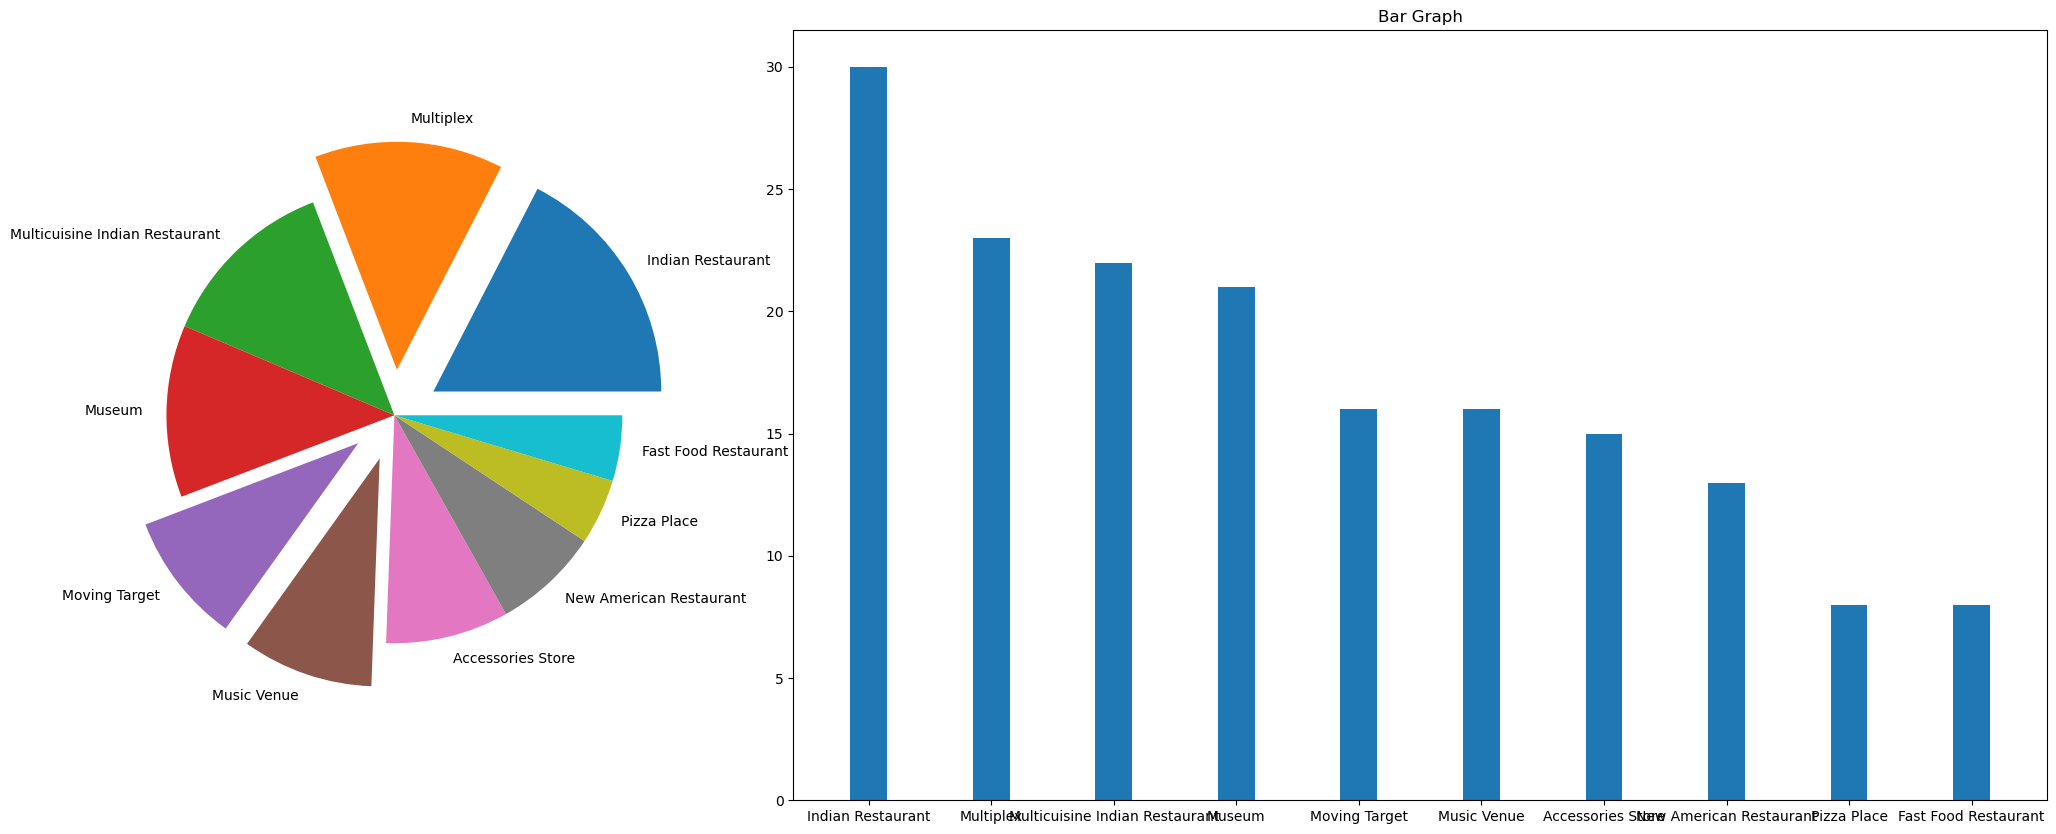

In [33]:
fig=plt.figure(figsize=(25,10))

ax0=fig.add_subplot(1,3,1)
plt.pie(np.array(pie_0),labels=pie_0.index,explode=[0.2,0.2,0,0,0.2,0.2,0,0,0,0])

ax1=fig.add_subplot(1,3,(2,3))
plt.bar(pie_0.index,pie_0,width=0.3)
ax1.set_title('Bar Graph')


Cluster 2

Top venues in Cluster 2 are :

In [34]:
label_1=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==1]
label_1.drop('Neighbourhood',axis=1,inplace=True)
d={}
for i in label_1.columns:
    for j in label_1.index:
        val=label_1.loc[j,i]
        if val not in d.keys():
            d[val]=1
        else:
            d[val]+=1
del d[1]
label_1_top=pd.Series(d,index=d.keys())
pie_1=label_1_top.sort_values(ascending=False).head(10)
pie_1

Museum                            18
Multicuisine Indian Restaurant    18
Multiplex                         18
Music Venue                       18
New American Restaurant           15
Accessories Store                 15
Bus Station                       13
Moving Target                     12
Movie Theater                      8
Pharmacy                           5
dtype: int64

Visualizing Cluster 2 Venues

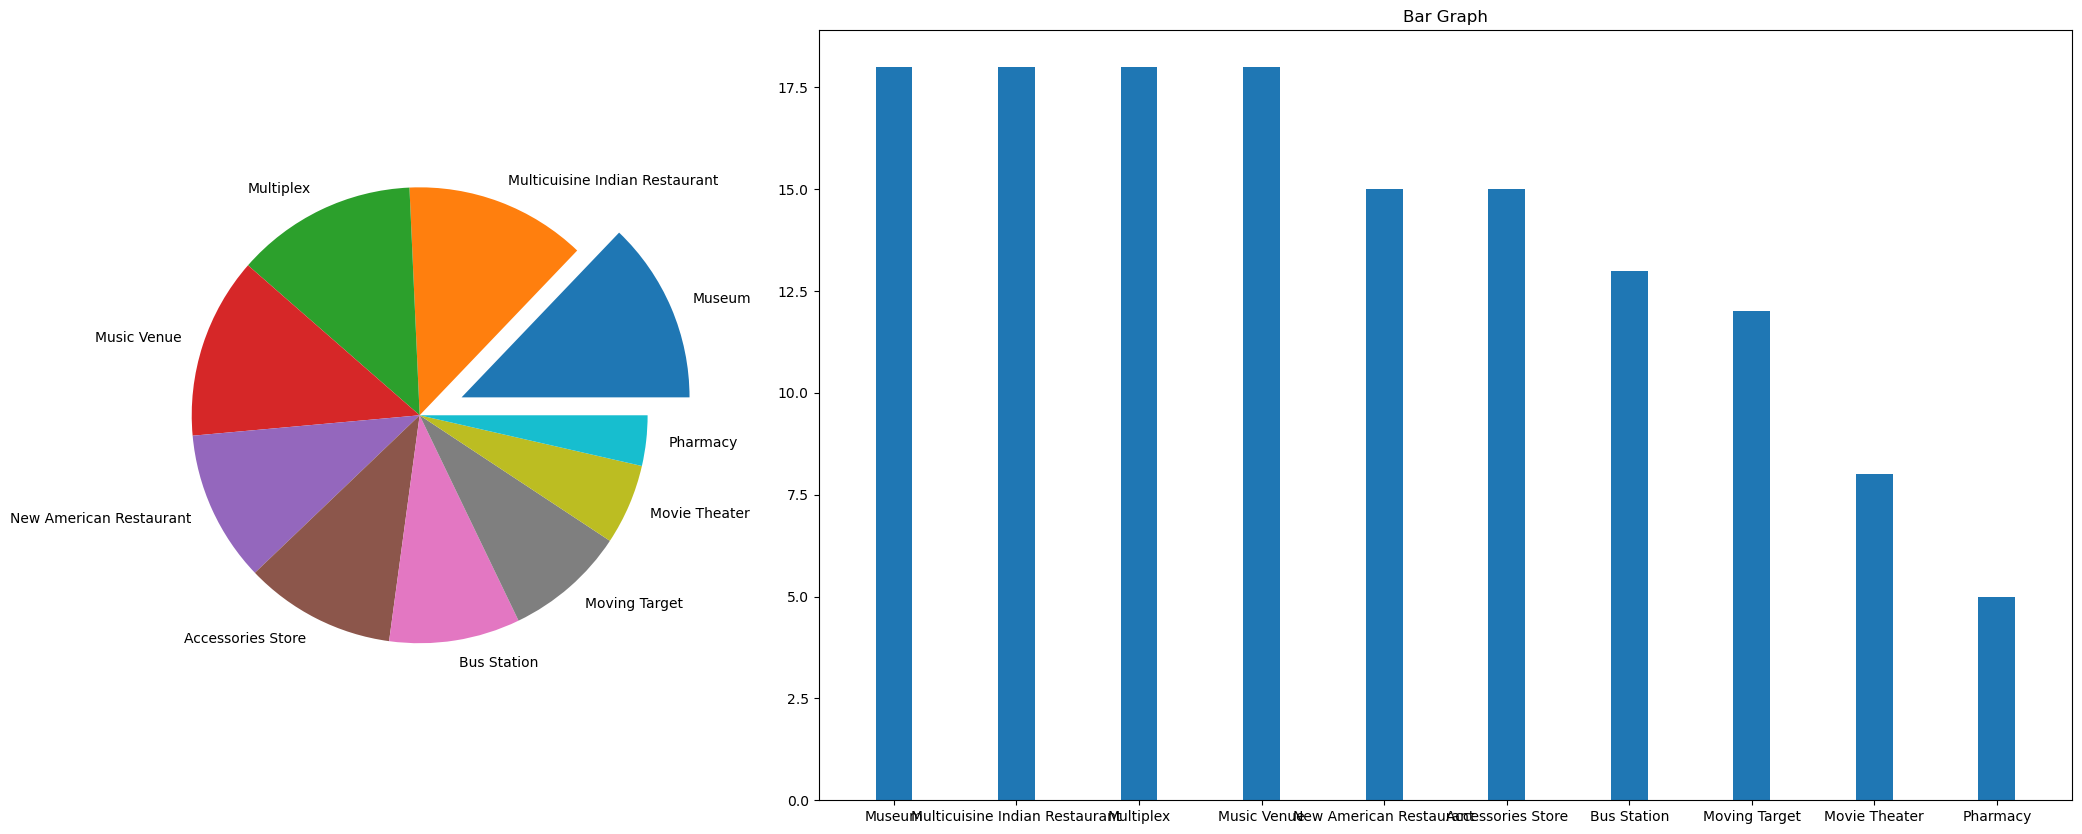

In [35]:
fig=plt.figure(figsize=(25,10))

ax0=fig.add_subplot(1,3,1)
plt.pie(np.array(pie_1),labels=pie_1.index,explode=[0.2,0,0,0,0,0,0,0,0,0])

ax1=fig.add_subplot(1,3,(2,3))
plt.bar(pie_1.index,pie_1,width=0.3)
ax1.set_title('Bar Graph')


plt.show()

Cluster 3

The top venues in Cluster 3 are

In [36]:
label_2=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==2]
label_2.drop('Neighbourhood',axis=1,inplace=True)
d={}
for i in label_2.columns:
    for j in label_2.index:
        val=label_2.loc[j,i]
        if val not in d.keys():
            d[val]=1
        else:
            d[val]+=1
del d[2]
label_2_top=pd.Series(d,index=d.keys())
pie_2=label_2_top.sort_values(ascending=False).head(10)
pie_2

Accessories Store                 6
Moving Target                     6
Multicuisine Indian Restaurant    6
Multiplex                         6
Museum                            6
Music Venue                       6
Pizza Place                       5
New American Restaurant           5
Burger Joint                      4
North Indian Restaurant           4
dtype: int64

Visualizing Cluster 3 Venues

Text(0.5, 1.0, 'Bar Graph')

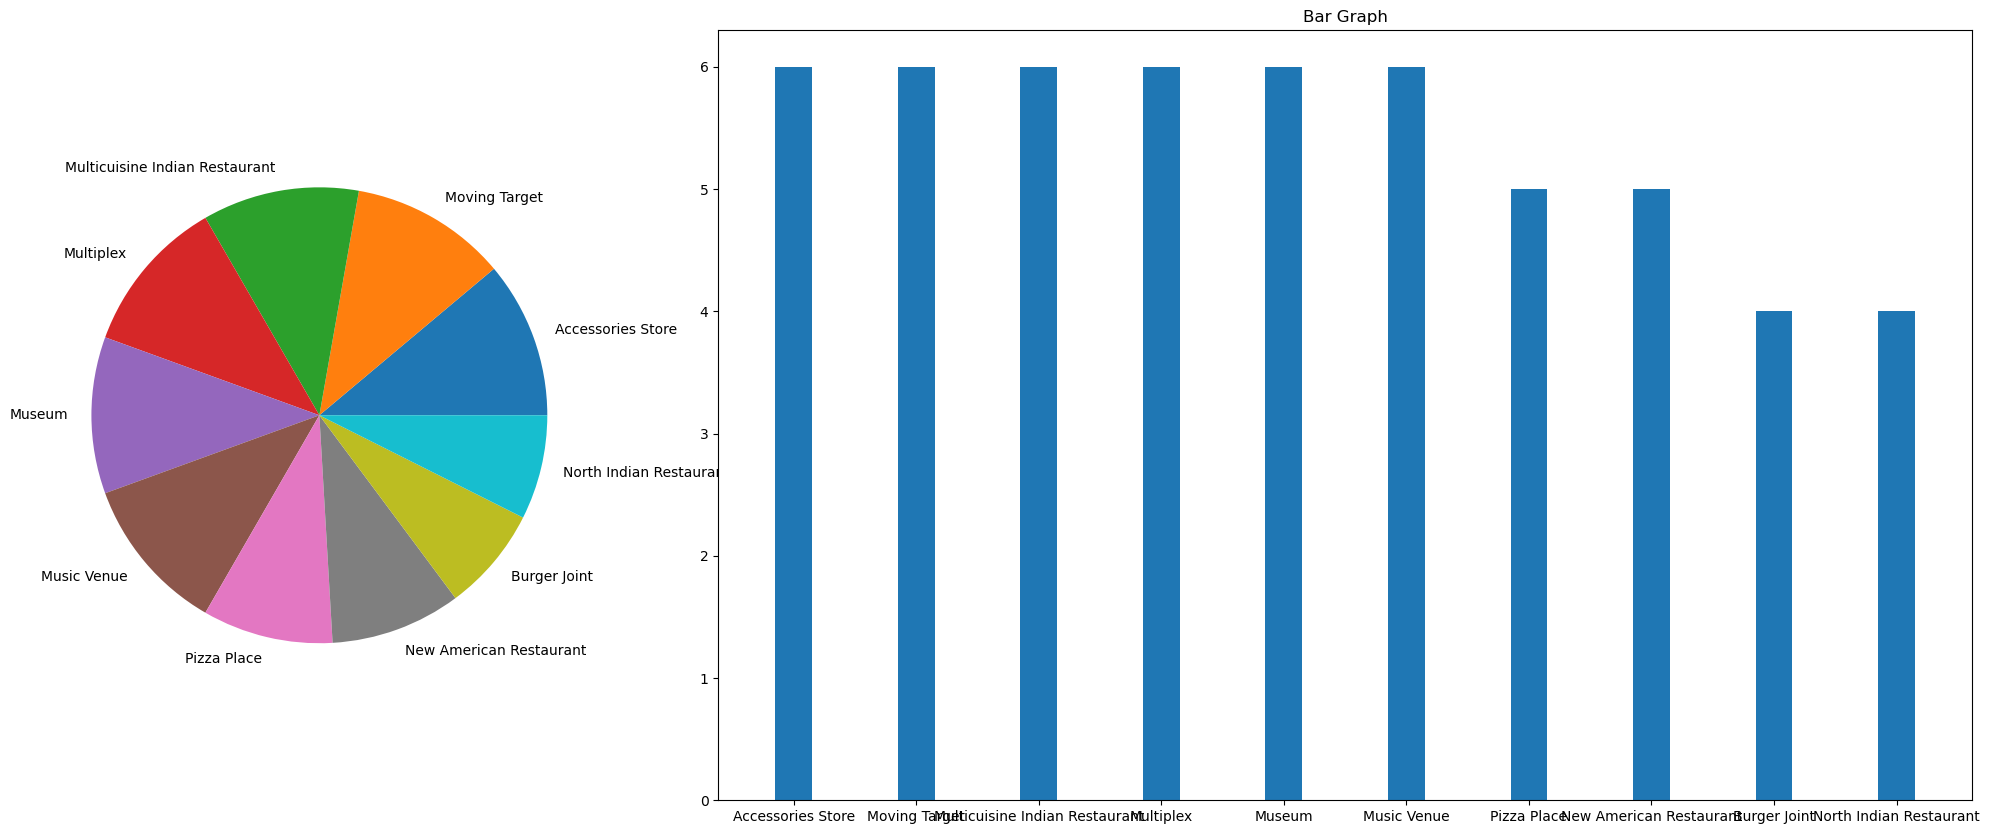

In [37]:
fig=plt.figure(figsize=(25,10))

ax0=fig.add_subplot(1,3,1)
plt.pie(np.array(pie_2),labels=pie_2.index)

ax1=fig.add_subplot(1,3,(2,3))
plt.bar(pie_2.index,pie_2,width=0.3)
ax1.set_title('Bar Graph')





Cluster 4

The top venues in Cluster 4 are

In [38]:
label_3=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==3]
label_3.drop('Neighbourhood',axis=1,inplace=True)
d={}
for i in label_3.columns:
    for j in label_3.index:
        val=label_3.loc[j,i]
        if val not in d.keys():
            d[val]=1
        else:
            d[val]+=1
del d[3]
label_3_top=pd.Series(d,index=d.keys())
pie_3=label_3_top.sort_values(ascending=False).head(10)
pie_3

Multiplex                         46
Museum                            41
Multicuisine Indian Restaurant    40
Music Venue                       34
Moving Target                     34
New American Restaurant           30
Accessories Store                 27
Movie Theater                     20
Indian Restaurant                 19
Café                              18
dtype: int64

Visualizing Cluster 4 Venues

Text(0.5, 1.0, 'Bar Graph')

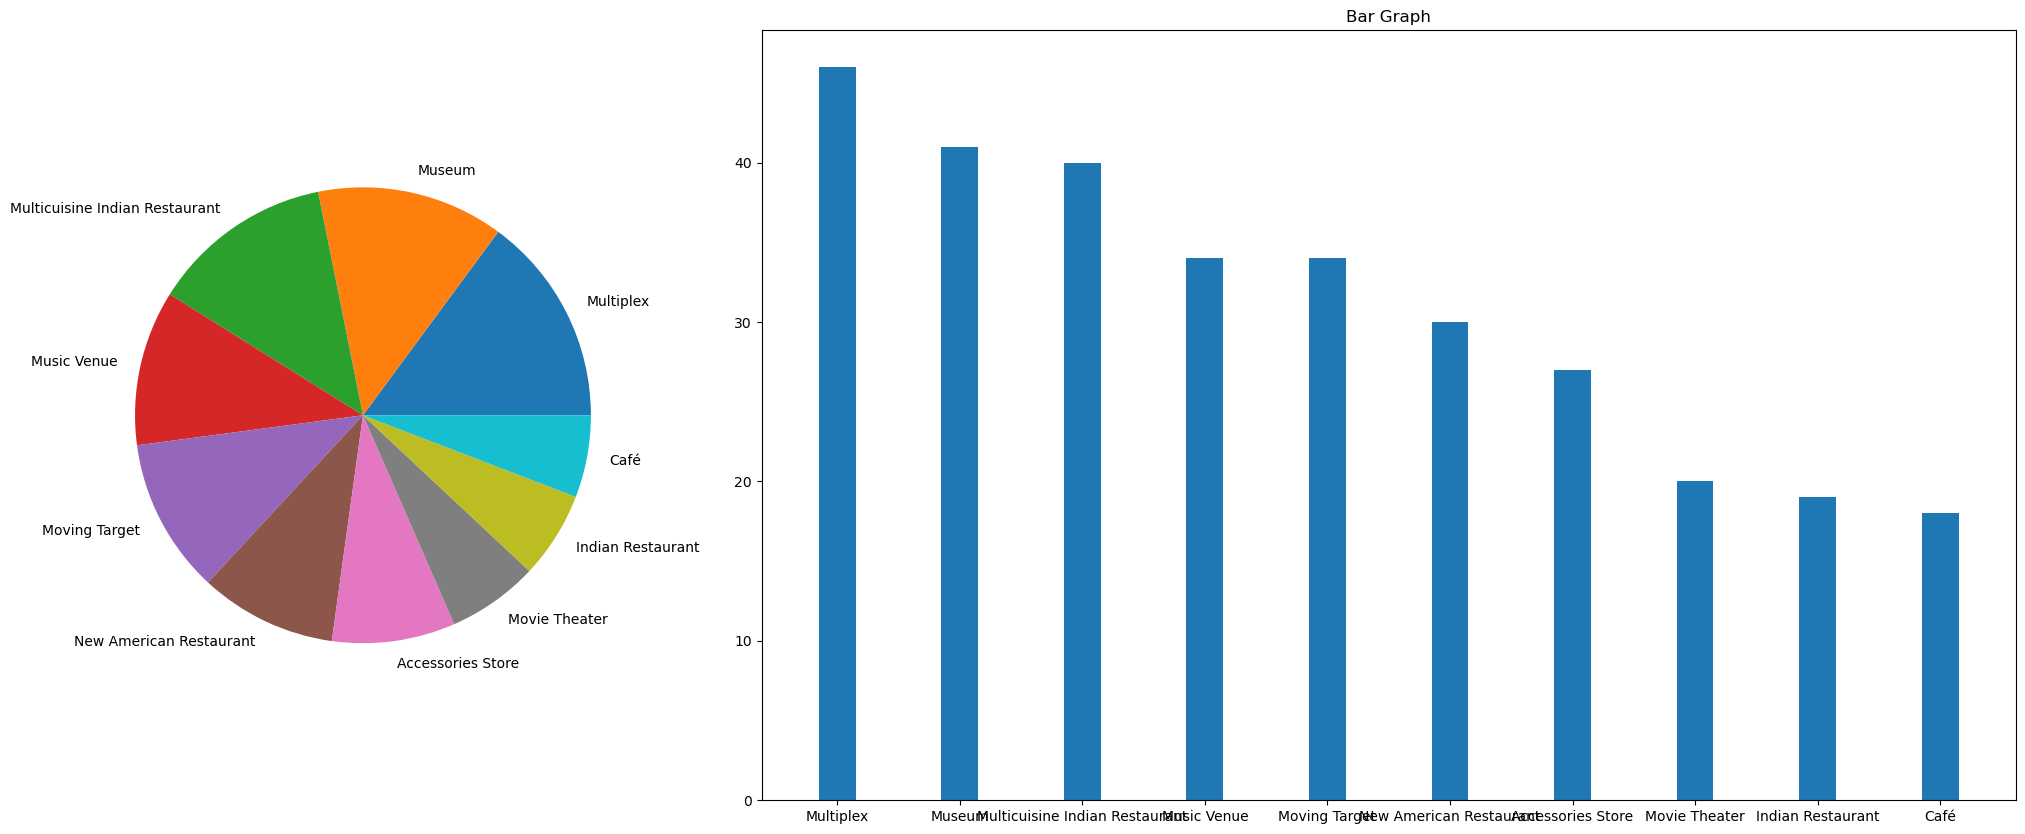

In [39]:
fig=plt.figure(figsize=(25,10))

ax0=fig.add_subplot(1,3,1)
plt.pie(np.array(pie_3),labels=pie_3.index)

ax1=fig.add_subplot(1,3,(2,3))
plt.bar(pie_3.index,pie_3,width=0.3)
ax1.set_title('Bar Graph')




Among the four Clusters, Cluster 3 seems to have equal distribution of all kinds of venues around.
Let us examine the cluster further.

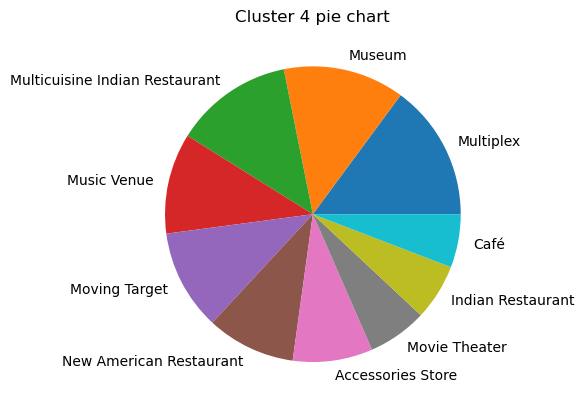

In [40]:
plt.pie(np.array(pie_3),labels=pie_3.index)
plt.title('Cluster 4 pie chart')
plt.show()

In [41]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==3]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,label
0,Adambakkam,Pharmacy,Indian Restaurant,Dessert Shop,IT Services,Asian Restaurant,Shoe Store,Bank,Accessories Store,New American Restaurant,Multicuisine Indian Restaurant,3
4,Alwarpet,Japanese Restaurant,Restaurant,Bakery,Department Store,Bookstore,Italian Restaurant,Men's Store,Grocery Store,North Indian Restaurant,Sandwich Place,3
5,Ambattur,Italian Restaurant,Office,Café,Chinese Restaurant,Sandwich Place,Bakery,Indian Restaurant,Park,Paper / Office Supplies Store,Performing Arts Venue,3
6,Aminjikarai,Electronics Store,Fast Food Restaurant,Pizza Place,Sporting Goods Shop,Multiplex,Clothing Store,Furniture / Home Store,Event Space,Café,Bookstore,3
7,Anna Nagar,Indian Restaurant,Café,Electronics Store,Fast Food Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Paper / Office Supplies Store,Park,Bookstore,Bistro,3
8,Arumbakkam,Department Store,Clothing Store,Pizza Place,Hotel,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,New American Restaurant,North Indian Restaurant,3
10,Avadi,Department Store,Juice Bar,Park,Accessories Store,New American Restaurant,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,3
12,Besant Nagar,Indian Restaurant,Ice Cream Shop,Coffee Shop,Bistro,Sandwich Place,Café,Dessert Shop,Donut Shop,New American Restaurant,Chinese Restaurant,3
16,Choolai,Fast Food Restaurant,Accessories Store,New American Restaurant,Moving Target,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,North Indian Restaurant,Motorcycle Shop,3
19,Egmore,Hotel,Shopping Mall,Indian Restaurant,Motel,Seafood Restaurant,Coffee Shop,Sandwich Place,Museum,Café,Thai Restaurant,3


So , These are the best Neighbourhoods in Chennai

In [42]:
selected=neighborhoods_venues_sorted[neighborhoods_venues_sorted['label']==3][['Neighbourhood']]

Let us a

In [43]:
pop_df=pd.read_csv('chennai_population.csv',names=['Neighbourhood','type','Population'])
pop_df

,Neighbourhood,type,Population
0,Town,Type,Population
1,Adayalampattu,Out Growth,"1,874"
2,Alamathi,Census Town,"7,424"
3,Anakaputhur,Municipality,"48,050"
4,Ayappakkam,Census Town,"29,511"
...,...,...,...
87,Valasaravakkam,Municipality,"47,378"
88,Vanagaram,Census Town,"19,208"
89,Vandalur,Census Town,"16,852"
90,Varadarajapuram,Out Growth,"3,383"


In [44]:
pd.merge(pop_df,selected,on='Neighbourhood')

,Neighbourhood,type,Population
0,Karapakkam,Out Growth,"8,958"
1,Kundrathur,Town Panchayat,"42,126"
2,Manali,Municipality,"35,248"
3,Manapakkam,Census Town,"13,344"
4,Meenambakkam,Town Panchayat,"4,286"
5,Nolambur,Census Town,"21,973"
6,Palavakkam,Census Town,"26,766"
7,Poonamallee,Municipality,"57,224"
8,Porur,Town Panchayat,"46,690"
9,Puzhal,Town Panchayat,"31,665"


Maduravoyal is the only Municipality Neighbourhood in Chennai.
Maduravoyal will be the best Neighbourhood to live in Chennai.